<a href="https://colab.research.google.com/github/heejinChang/DataScience/blob/master/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. 데이터 수집 및 전처리: 영화 데이터를 수집하고 필요한 경우 전처리를 수행합니다. 예를 들어, 결측치 처리, 이상치 제거, 범주형 변수 인코딩 등을 수행할 수 있습니다.

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (20.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [3]:
import io
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic') 



# 엑셀 파일 로드
file_path = '/content/drive/MyDrive/data/KOBIS_개봉일람_2023-05-13.csv'
df = pd.read_csv(file_path, encoding='utf-8')
df.head()

FileNotFoundError: ignored

In [ ]:
df1 = pd.read_csv(file_path, encoding='utf-8')
df1['국적'].isna().sum()

0

In [ ]:
print(df.describe()) 
print()

# 변수 개수 출력
print(f"총 변수 개수: {len(df.columns)}")
print(df.columns)
print()
# 피처 개수 x의 개수 출력
print(f"총 샘플 개수: {len(df)}")
print()


         Unnamed: 0            순번
count  14301.000000  14301.000000
mean    7151.000000   7151.000000
std     4128.487435   4128.487435
min        1.000000      1.000000
25%     3576.000000   3576.000000
50%     7151.000000   7151.000000
75%    10726.000000  10726.000000
max    14301.000000  14301.000000

총 변수 개수: 19
Index(['Unnamed: 0', '순번', '영화명', '감독', '제작사', '수입사', '배급사', '개봉일', '영화유형',
       '영화형태', '국적', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '장르', '등급',
       '영화구분'],
      dtype='object')

총 샘플 개수: 14301



In [ ]:
df.shape

(14301, 19)

In [ ]:
# 데이터의 결측치 개수 출력
print(df.isna().sum())

Unnamed: 0       0
순번               0
영화명              0
감독            1293
제작사           9353
수입사           6628
배급사             16
개봉일              0
영화유형             0
영화형태             0
국적               0
전국스크린수           0
전국매출액            0
전국관객수            0
서울매출액            0
서울관객수            0
장르              69
등급               0
영화구분             0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumGothic' # 나눔고딕 적용하기

<Axes: >

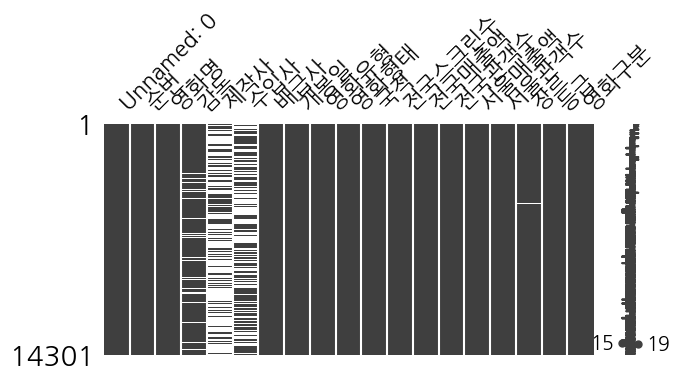

In [ ]:
#결측치 확인
msno.matrix(df, figsize=(7, 3))

In [ ]:
df.dtypes

Unnamed: 0     int64
순번             int64
영화명           object
감독            object
제작사           object
수입사           object
배급사           object
개봉일           object
영화유형          object
영화형태          object
국적            object
전국스크린수        object
전국매출액         object
전국관객수         object
서울매출액         object
서울관객수         object
장르            object
등급            object
영화구분          object
dtype: object

In [ ]:
filter_list = ['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']
for fl in filter_list:
  df[fl] = df[fl].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df.head()
df = df.astype({'전국스크린수':'int64', '전국매출액':'int64', '전국관객수':'int64', '서울매출액':'int64', '서울관객수':'int64'})

<Axes: >

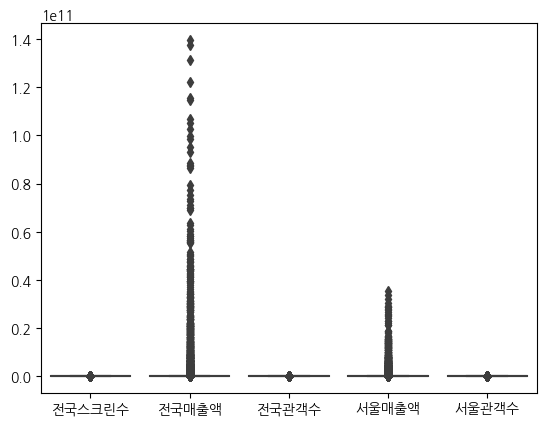

In [ ]:
#이상치 확인
sns.boxplot(data=df[['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']])

In [ ]:
#너무 많은 결측치를 가지고 있는 제작사,수입사 제거
#모두 똑같은 값을 가지고 있는 영화유형, 영화형태 제거
#순번 제거
print(df.head())

df = df.drop(columns=['제작사', '수입사'])
df = df.drop(columns=['영화유형', '영화형태'])
df = df.drop(columns=['순번'])

# 결과 확인
print(df.head())

   Unnamed: 0  순번         영화명           감독                             제작사  \
0           1   1        극한직업          이병헌  (주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠   
1           2   2   신과함께-죄와 벌          김용화          리얼라이즈픽쳐스(주),(주)덱스터스튜디오   
2           3   3  어벤져스: 엔드게임  안소니 루소,조 루소                             NaN   
3           4   4      겨울왕국 2  크리스 벅,제니퍼 리                             NaN   
4           5   5         베테랑          류승완                 (주)외유내강,(주)필름케이   

                  수입사                 배급사         개봉일  영화유형 영화형태  국적  전국스크린수  \
0                 NaN           (주)씨제이이엔엠  2019-01-23  개봉영화   장편  한국    1978   
1                 NaN       롯데쇼핑㈜롯데엔터테인먼트  2017-12-20  개봉영화   장편  한국    1912   
2  월트디즈니컴퍼니코리아 유한책임회사  월트디즈니컴퍼니코리아 유한책임회사  2019-04-24  개봉영화   장편  미국    2835   
3  월트디즈니컴퍼니코리아 유한책임회사  월트디즈니컴퍼니코리아 유한책임회사  2019-11-21  개봉영화   장편  미국    2648   
4                 NaN           (주)씨제이이엔엠  2015-08-05  개봉영화   장편  한국    1064   

          전국매출액     전국관객수        서울매출액    서울관객수   

In [ ]:
# def get_outlier(df=None, column=None, weight=1.5):
#   # target 값과 상관관계가 높은 열을 우선적으로 진행
#   quantile_25 = np.percentile(df[column].values, 25)
#   quantile_75 = np.percentile(df[column].values, 75)

#   IQR = quantile_75 - quantile_25
#   IQR_weight = IQR*weight
  
#   lowest = quantile_25 - IQR_weight
#   highest = quantile_75 + IQR_weight
  
#   outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
#   return outlier_idx

In [ ]:
# remove_outlier_column = ['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']

# for rm_col in remove_outlier_column:
#   outlier_idx = get_outlier(df, rm_col, weight=3.0)
#   df.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
df.shape

(14301, 14)

In [ ]:
# df1 = df.copy()
# # 각 열별 NaN 개수 출력
# print('Number of NaN values :\n',df.isna().sum())

# # 이상치 데이터 찾아 NaN으로 대체 
# df = df[((df['전국스크린수'] > 1) & (df['전국스크린수'] <= 3000 ))]
# df = df[(df['전국매출액'] > 1000) & (df['전국매출액'] <= 90000000000)]
# df = df[(df['전국관객수'] > 10) & (df['전국관객수'] <= 3000000)]
# df = df[(df['서울매출액'] > 0) & (df['서울매출액'] < 3000000)]
# df = df[(df['서울관객수'] > 0) & (df['서울관객수'] < 10000000000)]



# # 결과 출력
# print(df1)

# # 각 열별 NaN 개수 출력
# print('Number of NaN values :\n',df1.isna().sum())

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 각 열별 NaN 개수 출력
print('Number of NaN values:\n', df1.isna().sum())

# 결측값 처리: 중앙값으로 대체
df1.fillna(df1.median(), inplace=True)

# 이상치를 채우기 위한 선형 회귀 모델 초기화
regressor = LinearRegression()

# 대체값을 예측하기 위해 사용할 특성들 선택
features = ['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']

# 결측값을 예측하여 이상치 채우기
for feature in features:
    # 결측값이 있는 행 추출
    missing_rows = df1[df1[feature].isna()]
    
    # 결측값이 없는 행 추출
    valid_rows = df1[~df1[feature].isna()]
    
    # 결측값이 있는 행이 존재하는 경우에만 선형 회귀 모델 훈련
    if not missing_rows.empty:
        regressor.fit(valid_rows[features], valid_rows[feature])
        
        # 결측값 예측
        predicted_values = regressor.predict(missing_rows[features])
        
        # 예측값으로 결측값 대체
        df1.loc[df1[feature].isna(), feature] = predicted_values

# 결과 출력
print(df1)

# 각 열별 NaN 개수 출력
print('Number of NaN values:\n', df1.isna().sum())


Number of NaN values:
 Unnamed: 0       0
순번               0
영화명              0
감독            1293
제작사           9353
수입사           6628
배급사             16
개봉일              0
영화유형             0
영화형태             0
국적               0
전국스크린수           0
전국매출액            0
전국관객수            0
서울매출액            0
서울관객수            0
장르              69
등급               0
영화구분             0
dtype: int64
       Unnamed: 0     순번             영화명           감독  \
0               1      1            극한직업          이병헌   
1               2      2       신과함께-죄와 벌          김용화   
2               3      3      어벤져스: 엔드게임  안소니 루소,조 루소   
3               4      4          겨울왕국 2  크리스 벅,제니퍼 리   
4               5      5             베테랑          류승완   
...           ...    ...             ...          ...   
14296       14297  14297            T-34    알렉세이 시도로프   
14297       14298  14298        VIP전용 여자      카네다 사토시   
14298       14299  14299     VJ의 은밀한 사생활       오카다 히로   
14299       14300  14300  XX 니들은 

<Axes: >

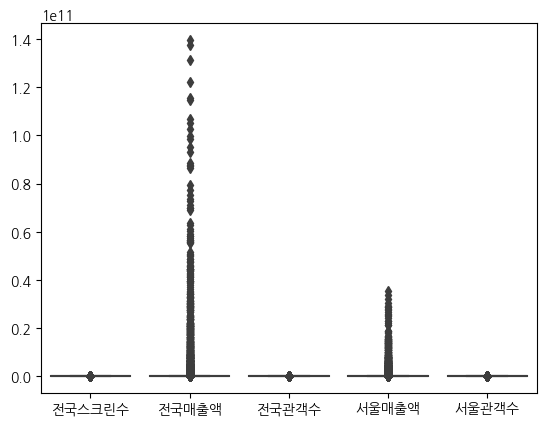

In [ ]:
#이상치 확인
sns.boxplot(data=df[['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수']])

2. 데이터 탐색: 시각화 및 통계 분석을 통해 데이터의 특성을 파악합니다. 예를 들어, 상관 관계 분석, 히스토그램 및 상자 그림 등을 사용하여 데이터의 분포와 패턴을 확인할 수 있습니다.

In [ ]:
# 상관관계 행렬
correlation_matrix = df.corr()

# 상관관계 행렬에서 대각선을 제외한 상관계수의 절댓값을 정렬
sorted_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1]

# 상관계수가 높은 변수 쌍 3개와 낮은 변수 쌍 3개를 출력
print("상관 계수가 높은 변수 쌍 3개:")
print(sorted_correlations.head(3))
print("\n상관 계수가 낮은 변수 쌍 3개:")
print(sorted_correlations.tail(3))

상관 계수가 높은 변수 쌍 3개:
전국매출액  전국관객수    0.994284
전국관객수  전국매출액    0.994284
서울관객수  서울매출액    0.994154
dtype: float64

상관 계수가 낮은 변수 쌍 3개:
전국관객수       Unnamed: 0    0.240242
Unnamed: 0  전국매출액         0.237227
전국매출액       Unnamed: 0    0.237227
dtype: float64



전국 매출액과 상관계수가 높은 변수 순서:
전국관객수         0.994284
서울매출액         0.990515
서울관객수         0.985860
전국스크린수        0.720387
Unnamed: 0   -0.237227
Name: 전국매출액, dtype: float64
            Unnamed: 0    전국스크린수     전국매출액     전국관객수     서울매출액     서울관객수
Unnamed: 0    1.000000 -0.494400 -0.237227 -0.240242 -0.244717 -0.248392
전국스크린수       -0.494400  1.000000  0.720387  0.712298  0.721456  0.713999
전국매출액        -0.237227  0.720387  1.000000  0.994284  0.990515  0.985860
전국관객수        -0.240242  0.712298  0.994284  1.000000  0.984454  0.991158
서울매출액        -0.244717  0.721456  0.990515  0.984454  1.000000  0.994154
서울관객수        -0.248392  0.713999  0.985860  0.991158  0.994154  1.000000


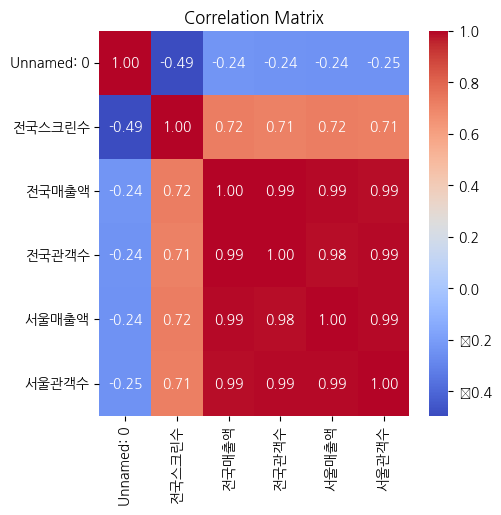

In [ ]:
#전국 매출액과 상관계수가 높은 변수를 순서대로 출력
print("\n전국 매출액과 상관계수가 높은 변수 순서:")
print(correlation_matrix['전국매출액'].sort_values(ascending=False)[1:])

# 상관 관계 분석
corr_matrix = df.corr()
print(corr_matrix)

# 상관 관계 시각화
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

국적
마케도니아     2.000000e+03
우즈베키스탄    3.000000e+03
포르투갈      5.000000e+03
세르비아      5.000000e+03
베네수엘라     1.900000e+04
              ...     
아일랜드      3.843884e+08
대만        4.462079e+08
벨기에       5.301352e+08
한국        1.168625e+09
미국        2.211878e+09
Name: 전국매출액, Length: 66, dtype: float64


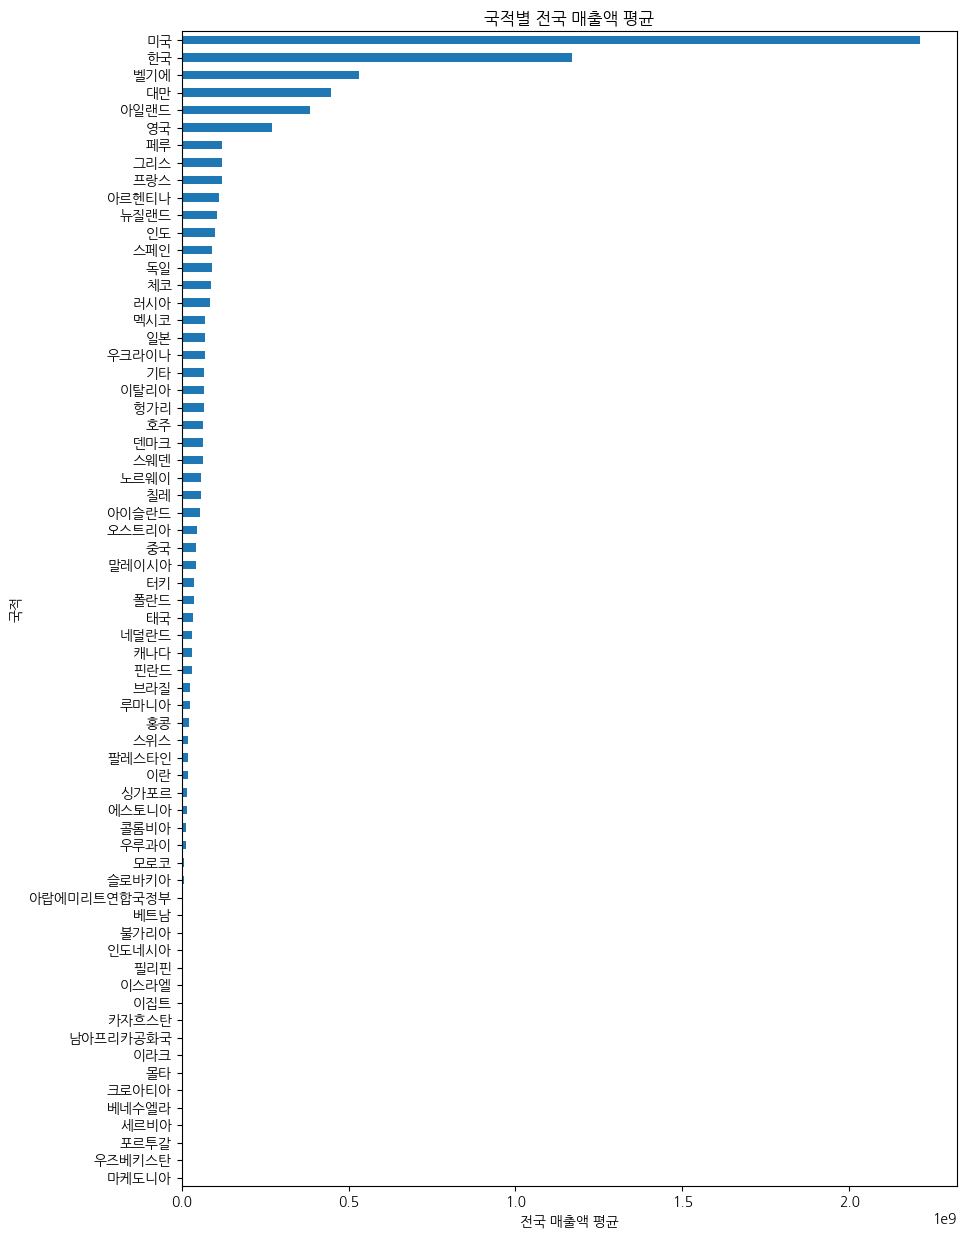

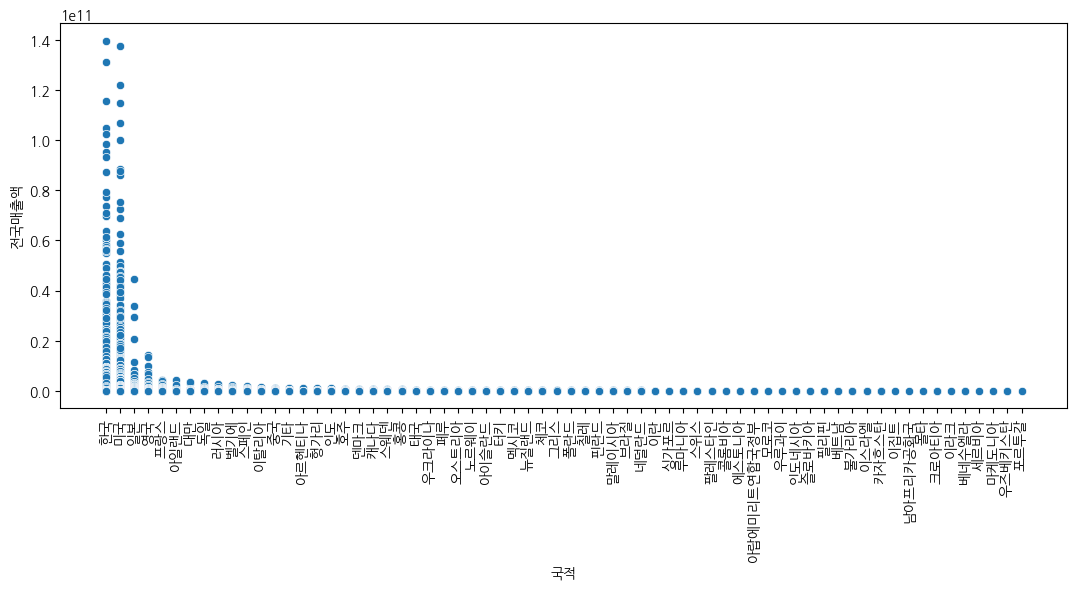

In [ ]:
grouped_mean = df.groupby(['국적'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(10, 15))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('국적')
plt.title('국적별 전국 매출액 평균')
plt.show()


plt.figure(figsize=[13,5])
ax = sns.scatterplot(data=df, x='국적', y = '전국매출액')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # 이름 기울이기
plt.show()

장르
성인물(에로)     4.591753e+04
서부극(웨스턴)    9.880909e+04
멜로/로맨스      6.897433e+07
기타          7.928896e+07
공연          1.132178e+08
다큐멘터리       1.473944e+08
가족          2.027988e+08
공포(호러)      4.022337e+08
SF          4.829363e+08
전쟁          7.793838e+08
드라마         8.540438e+08
스릴러         9.026329e+08
뮤지컬         1.029778e+09
코미디         1.647112e+09
애니메이션       1.679868e+09
미스터리        2.052703e+09
판타지         2.573633e+09
액션          3.397130e+09
범죄          4.170223e+09
어드벤처        4.304343e+09
사극          1.114020e+10
Name: 전국매출액, dtype: float64


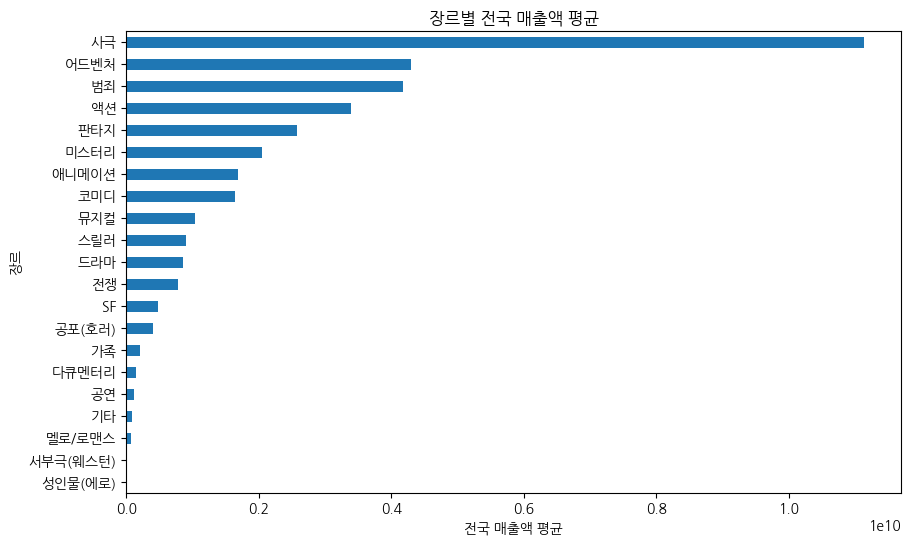

<Axes: xlabel='장르', ylabel='전국매출액'>

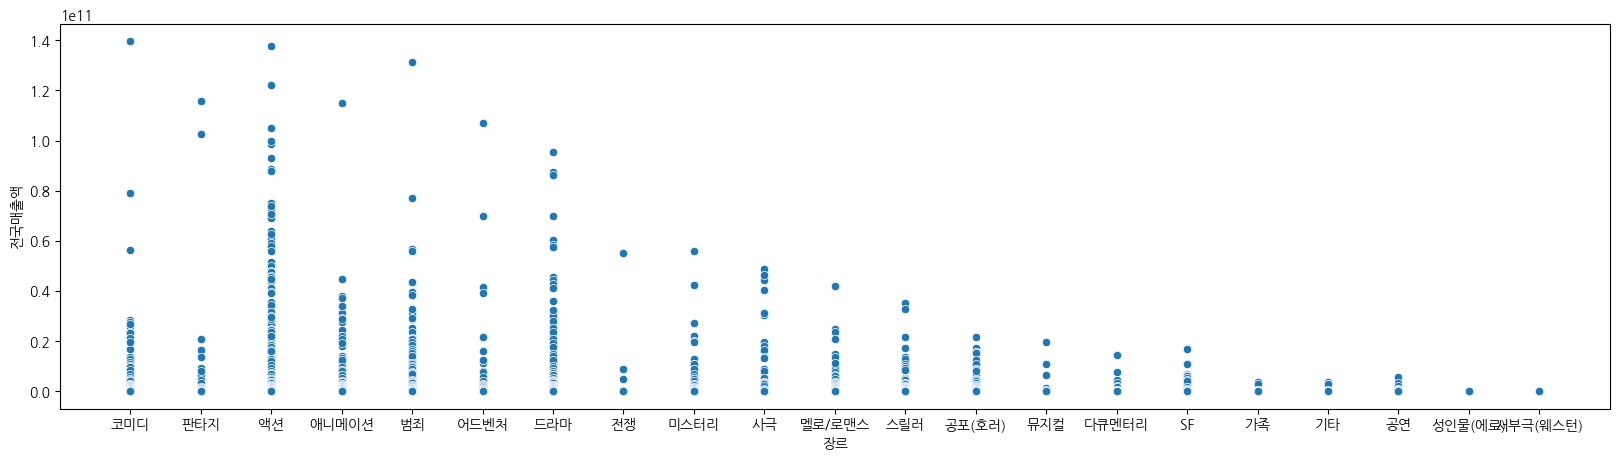

In [ ]:
grouped_mean = df.groupby(['장르'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(10, 6))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('장르')
plt.title('장르별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[20,5])
sns.scatterplot(data=df, x='장르', y = '전국매출액')

---- unique key 개수 줄이는 부분 ----

In [ ]:
director_filter = list(df.groupby(['감독'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False]).index[:15]) + list(df['감독'].value_counts().index[:15])

In [ ]:
df['등급'].value_counts() # 15세관람가 부터는 개수가 너무 적기 때문에 나머지를 삭제해준다.
filters = list(df['등급'].value_counts().index[4:])

for filter in filters:
  df.drop(df[df['등급']==filter].index, axis=0, inplace=True)

df['등급'].value_counts()# 등급의 unique 값이 4개로 줄어든 것을 알 수 있다
def get_dir(x): # 매출액 상위 15명과 영화를 많이 만든 상위 15명 감독을 제외하고 나머지를 기타로 바꿔주는 함수
  director_filter = list(df.groupby(['감독'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False]).index[:15]) + list(df['감독'].value_counts().index[:15])
  for filter in director_filter:
    if (director_filter.count(x)>0):
      return x
    else:
      return '기타'

df['감독'] = df['감독'].apply(get_dir)# 함수 적용

df_distributor_list = df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])
df_distributor_list = df_distributor_list[:15].index + df['배급사'].value_counts()[:15].index
# 가장 영화를 많이 만든 상위 15개의 제작사와 매출액이 가장 높은 상위 15개의 배급사 목록을 만들었다.
def get_distributor(x): # 매출액 상위 15명과 영화를 많이 만든 상위 15명 배급사를 제외하고 나머지를 기타로 바꿔주는 함수
  df_distributor_filter = list(df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['배급사'].value_counts()[:15].index)
  for filter in df_distributor_filter:
    if (df_distributor_filter.count(x)>0):
      return x
    else:
      return '기타'

df['배급사'] = df['배급사'].apply(get_distributor)# 함수 적용

# 장르는 얼마 없기 때문에 매출액의 평균순으로 인코딩함
def get_country(x): #  매출액 상위 6개의 국가를 제외한 나머지를 기타로 바꿔주는 함수
  df_country_filter = list(df.groupby(['국적'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:6].index)
  for filter in df_country_filter:
    if (df_country_filter.count(x)>0):
      return x
    else:
      return '기타'

df['국적'] = df['국적'].apply(get_country)# 함수 적용

In [ ]:
df['개봉일'] = pd.to_datetime(df['개봉일']) # 개봉월 column 추가
df['개봉월'] = df['개봉일'].dt.month

In [ ]:
df

,Unnamed: 0,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉월
0,1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,한국,1978,139647979516,16264944,31858660536,3638287,코미디,15세이상관람가,일반영화,1
1,2,신과함께-죄와 벌,김용화,기타,2017-12-20,한국,1912,115698654137,14410754,27530825087,3346172,판타지,12세이상관람가,일반영화,12
2,3,어벤져스: 엔드게임,"안소니 루소,조 루소",월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,미국,2835,122182694160,13934592,33577136860,3597963,액션,12세이상관람가,일반영화,4
3,4,겨울왕국 2,"크리스 벅,제니퍼 리",월트디즈니컴퍼니코리아 유한책임회사,2019-11-21,미국,2648,114810421450,13747792,28824682580,3225974,애니메이션,전체관람가,일반영화,11
4,5,베테랑,류승완,(주)씨제이이엔엠,2015-08-05,한국,1064,105024756250,13395400,26766369950,3290366,액션,15세이상관람가,일반영화,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14296,14297,T-34,기타,기타,2019-06-27,기타,1,5000,1,0,0,전쟁,12세이상관람가,독립/예술영화,6
14297,14298,VIP전용 여자,기타,(주)도키엔터테인먼트,2016-12-01,기타,1,8000,1,0,0,성인물(에로),청소년관람불가,일반영화,12
14298,14299,VJ의 은밀한 사생활,기타,(주)영진크리에이티브,2017-12-25,기타,1,6000,1,0,0,멜로/로맨스,청소년관람불가,일반영화,12
14299,14300,XX 니들은 하지마라 결혼,기타,기타,2022-11-16,한국,1,6000,1,0,0,성인물(에로),청소년관람불가,일반영화,11


In [ ]:
df[983: 985]

,Unnamed: 0,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉월
983,984,나의 청춘은 너의 것,기타,기타,2020-04-29,대만,533,714892500,84442,205056740,23586,멜로/로맨스,12세이상관람가,독립/예술영화,4
985,986,신은 죽지 않았다 3: 어둠 속의 빛,기타,기타,2018-07-19,미국,179,646846900,83474,144472000,17629,드라마,12세이상관람가,독립/예술영화,7


In [ ]:
def remove_row(x):
  preprocessing_col_list = [2, 3, 5, 10, 11]
  cnt_list = []
  for idx in range(x.shape[0]):
    cnt=0
    for col in preprocessing_col_list:
      if x.iat[idx, col] =='기타':
        cnt += 1
    if(cnt>2):  
      cnt_list.append(idx)
  return cnt_list

df_cnt = remove_row(df)

In [ ]:
df_cnt

[76,
 92,
 174,
 303,
 385,
 397,
 421,
 422,
 440,
 443,
 456,
 458,
 462,
 482,
 527,
 530,
 544,
 567,
 568,
 589,
 604,
 622,
 626,
 654,
 668,
 670,
 676,
 690,
 692,
 696,
 702,
 704,
 706,
 710,
 715,
 718,
 725,
 731,
 732,
 734,
 742,
 745,
 757,
 759,
 763,
 773,
 774,
 779,
 792,
 793,
 797,
 803,
 804,
 820,
 821,
 833,
 845,
 847,
 848,
 855,
 862,
 865,
 869,
 878,
 886,
 889,
 895,
 914,
 916,
 920,
 929,
 941,
 943,
 944,
 945,
 951,
 953,
 954,
 955,
 965,
 966,
 971,
 972,
 982,
 991,
 997,
 1003,
 1006,
 1009,
 1010,
 1019,
 1025,
 1032,
 1033,
 1034,
 1037,
 1041,
 1045,
 1047,
 1057,
 1058,
 1059,
 1062,
 1063,
 1064,
 1067,
 1069,
 1070,
 1071,
 1072,
 1082,
 1083,
 1090,
 1091,
 1095,
 1103,
 1115,
 1116,
 1121,
 1122,
 1130,
 1131,
 1133,
 1135,
 1141,
 1150,
 1151,
 1154,
 1158,
 1162,
 1164,
 1178,
 1183,
 1189,
 1195,
 1202,
 1203,
 1207,
 1213,
 1214,
 1219,
 1222,
 1227,
 1234,
 1237,
 1240,
 1242,
 1247,
 1249,
 1252,
 1253,
 1258,
 1263,
 1268,
 1272,
 12

In [ ]:
df.index = range(df.shape[0])

In [ ]:
df.drop(df_cnt, axis=0, inplace=True)

In [ ]:
director_filter = list(df.groupby(['감독'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['감독'].value_counts().index[:15])
replace_dict = {}
for idx, director_name in enumerate(director_filter):
  replace_dict[director_name] = idx
df['감독'] = df['감독'].map(replace_dict)


distributor_filter = list(df.groupby(['배급사'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:15].index) + list(df['배급사'].value_counts()[:15].index)
replace_dict = {}
for idx, distributor in enumerate(distributor_filter):
  replace_dict[distributor] = idx

df['배급사'] = df['배급사'].map(replace_dict)



film_rating_filter = ['12세이상관람가', '15세이상관람가', '전체관람가', '청소년관람불가']
replace_dict = {}
for idx, film_rating in enumerate(film_rating_filter):
  replace_dict[film_rating] = idx

df['등급'] = df['등급'].map(replace_dict)



genre_filter = list(df.groupby(['장르'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False]).index)
replace_dict = {}
for idx, genre in enumerate(genre_filter):
  replace_dict[genre] = idx

df['장르'] = df['장르'].map(replace_dict)



country_filter = list(df.groupby(['국적'])['전국매출액', '서울매출액'].mean().sort_values(by=['전국매출액'], ascending=[False])[:6].index)
replace_dict = {}
for idx, country in enumerate(country_filter):
  replace_dict[country] = idx
replace_dict['기타'] = 6
df['국적'] = df['국적'].map(replace_dict)

In [ ]:
df

,Unnamed: 0,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉월
0,1,극한직업,13.0,12.0,2019-01-23,1,1978,139647979516,16264944,31858660536,3638287,7.0,1,일반영화,1
1,2,신과함께-죄와 벌,2.0,15.0,2017-12-20,1,1912,115698654137,14410754,27530825087,3346172,4.0,0,일반영화,12
2,3,어벤져스: 엔드게임,5.0,9.0,2019-04-24,0,2835,122182694160,13934592,33577136860,3597963,3.0,0,일반영화,4
3,4,겨울왕국 2,1.0,9.0,2019-11-21,0,2648,114810421450,13747792,28824682580,3225974,5.0,2,일반영화,11
4,5,베테랑,9.0,12.0,2015-08-05,1,1064,105024756250,13395400,26766369950,3290366,3.0,1,일반영화,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14287,14295,SNS 러브,15.0,15.0,2021-01-28,0,1,1000,1,0,0,18.0,3,일반영화,1
14290,14298,VIP전용 여자,15.0,17.0,2016-12-01,6,1,8000,1,0,0,20.0,3,일반영화,12
14291,14299,VJ의 은밀한 사생활,15.0,16.0,2017-12-25,6,1,6000,1,0,0,18.0,3,일반영화,12
14292,14300,XX 니들은 하지마라 결혼,15.0,15.0,2022-11-16,1,1,6000,1,0,0,20.0,3,일반영화,11


            Unnamed: 0        감독       배급사        국적    전국스크린수     전국매출액  \
Unnamed: 0    1.000000  0.162619  0.242793  0.390863 -0.526190 -0.270731   
감독            0.162619  1.000000  0.042858  0.006650 -0.132907 -0.137095   
배급사           0.242793  0.042858  1.000000  0.108677 -0.227817 -0.181026   
국적            0.390863  0.006650  0.108677  1.000000 -0.232615 -0.121653   
전국스크린수       -0.526190 -0.132907 -0.227817 -0.232615  1.000000  0.728796   
전국매출액        -0.270731 -0.137095 -0.181026 -0.121653  0.728796  1.000000   
전국관객수        -0.274032 -0.134833 -0.181339 -0.122517  0.720187  0.994308   
서울매출액        -0.278020 -0.132258 -0.182555 -0.128009  0.730323  0.990629   
서울관객수        -0.282000 -0.130064 -0.183110 -0.128905  0.722258  0.985891   
장르            0.520680  0.154009  0.138589  0.338124 -0.406937 -0.227418   
등급            0.572331  0.184277  0.196292  0.316520 -0.390579 -0.213935   
개봉월          -0.016016 -0.014893 -0.018352 -0.036839  0.001193  0.012263   

           

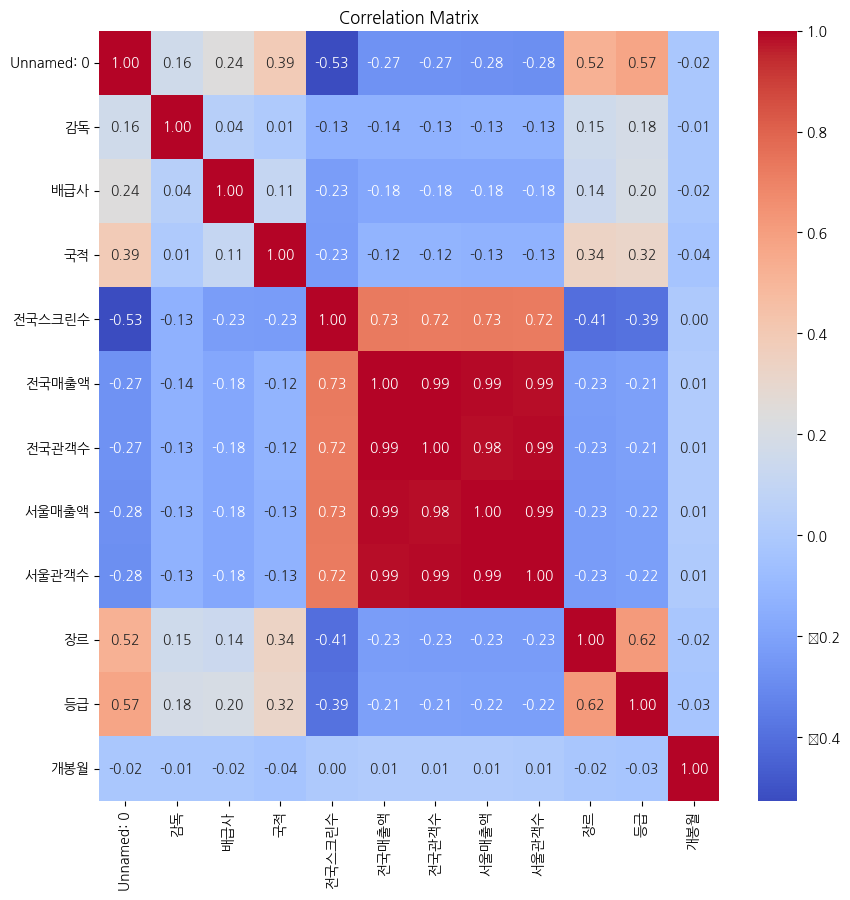

In [ ]:
# 상관 관계 분석
corr_matrix = df.corr()
print(corr_matrix)

# 상관 관계 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# rank인코딩 된 부분이 어느정도 결과값과 반비례관계를 가지도록 만들었다.

여기까지 preprocessing부분입니다!

등급
3    9.538580e+07
2    1.739347e+09
1    2.125261e+09
0    4.282077e+09
Name: 전국매출액, dtype: float64


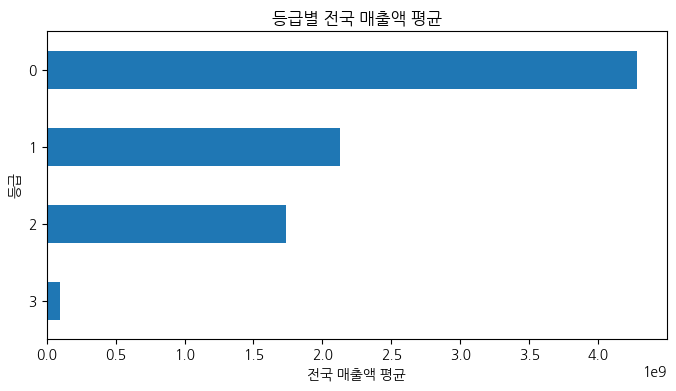

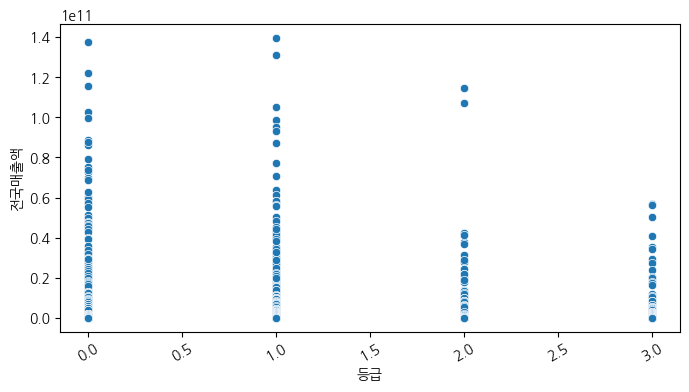

In [ ]:
grouped_mean = df.groupby(['등급'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(8, 4))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('등급')
plt.title('등급별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[8,4])
ax = sns.scatterplot(data=df, x='등급', y = '전국매출액')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30) # 이름 기울이기
plt.show()

영화구분
독립/예술영화    1.588132e+08
일반영화       1.115267e+09
Name: 전국매출액, dtype: float64


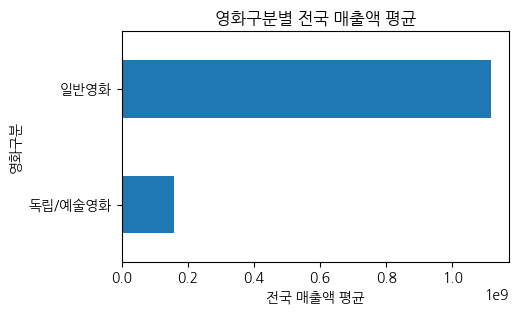

<Axes: xlabel='영화구분', ylabel='전국매출액'>

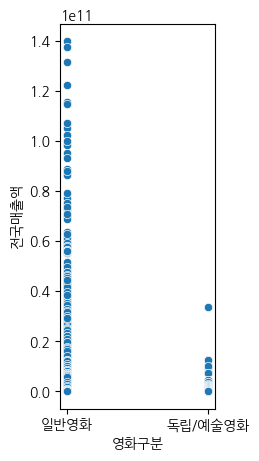

In [ ]:
grouped_mean = df.groupby(['영화구분'])['전국매출액'].mean().sort_values()
print(grouped_mean)

plt.figure(figsize=(5, 3))
grouped_mean.plot(kind='barh')
plt.xlabel('전국 매출액 평균')
plt.ylabel('영화구분')
plt.title('영화구분별 전국 매출액 평균')
plt.show()

plt.figure(figsize=[2,5])
sns.scatterplot(data=df, x='영화구분', y = '전국매출액')

In [ ]:
# #Encoding 
# from sklearn import preprocessing 
# #장르
# #features = ['감독', '배급사','장르','등급','영화구분', '전국스크린수']
# print(df1['장르'].unique())
# le = preprocessing.LabelEncoder()
# df1['장르'] = le.fit_transform(df1['장르'])
# #print(df1['장르'])

# #등급
# print(df1['등급'].unique())
# df1['등급'] = le.fit_transform(df1['등급'])
# #print(df1['등급'])

# #영화구분 
# print(df1['영화구분'].unique())
# df1['영화구분'] = le.fit_transform(df1['영화구분'])
# #print(df1['영화구분'])

# #국적 
# print(df1['국적'].unique())
# df1['국적'] = le.fit_transform(df1['국적'])
# #print(df1['국적'])

# #감독 
# print(df1['감독'].unique())
# df1['감독']=le.fit_transform(df1['감독'])

# #배급사
# print(df1['배급사'].unique())
# df1['배급사']=le.fit_transform(df1['배급사'])

In [ ]:
# df1.head()

In [ ]:
# df1['감독'].value_counts()

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

#, '서울매출액','전국스크린수','서울관객수', '전국관객수'
features = ['감독', '배급사', '장르', '등급', '국적', '전국스크린수']
X = df[features]
print(X)
target = ['전국매출액']
y = df[target]


         감독   배급사    장르  등급  국적  전국스크린수
0      13.0  12.0   7.0   1   1    1978
1       2.0  15.0   4.0   0   1    1912
2       5.0   9.0   3.0   0   0    2835
3       1.0   9.0   5.0   2   0    2648
4       9.0  12.0   3.0   1   1    1064
...     ...   ...   ...  ..  ..     ...
14287  15.0  15.0  18.0   3   0       1
14290  15.0  17.0  20.0   3   6       1
14291  15.0  16.0  18.0   3   6       1
14292  15.0  15.0  20.0   3   1       1
14293  15.0  17.0  20.0   3   6       1

[11634 rows x 6 columns]


In [ ]:
# #Log transformation
# #로그변환을 통해 왜도와 첨도를 가진 변수를 정규분포에 가깝게 만들어준다. 큰 수치를 같은 비율의 작은 수치로 변환
# sns.distplot(X)
# #로그변환
# np.log1p(X)


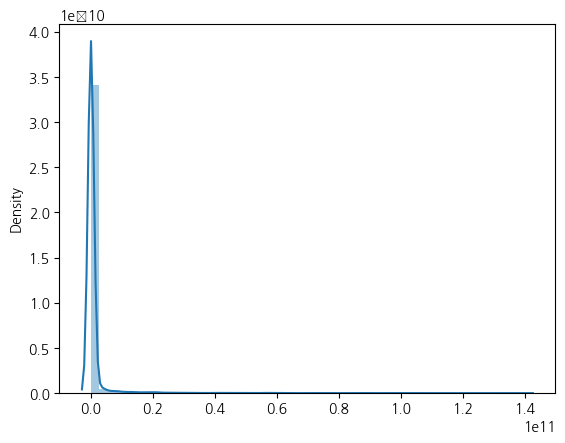

In [ ]:
sns.distplot(y)
#로그변환
y = np.log1p(y)
# np.log1p(y)

In [ ]:
df['국적'].isna().sum()

0

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
# 변형 객체 생성
maxAbs = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxAbs.fit(X)

# 훈련 데이터 스케일링
X = maxAbs.transform(X)

print(X)
# 변형 객체 생성
maxAbs = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxAbs.fit(y)

# 훈련 데이터 스케일링
y = maxAbs.transform(y)

print(y)

[[4.48275862e-01 4.13793103e-01 3.50000000e-01 3.33333333e-01
  1.66666667e-01 6.70963365e-01]
 [6.89655172e-02 5.17241379e-01 2.00000000e-01 0.00000000e+00
  1.66666667e-01 6.48575305e-01]
 [1.72413793e-01 3.10344828e-01 1.50000000e-01 0.00000000e+00
  0.00000000e+00 9.61668928e-01]
 ...
 [5.17241379e-01 5.51724138e-01 9.00000000e-01 1.00000000e+00
  1.00000000e+00 3.39213026e-04]
 [5.17241379e-01 5.17241379e-01 1.00000000e+00 1.00000000e+00
  1.66666667e-01 3.39213026e-04]
 [5.17241379e-01 5.86206897e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 3.39213026e-04]]
[[1.        ]
 [0.99266881]
 [0.99479365]
 ...
 [0.3390051 ]
 [0.3390051 ]
 [0.35021374]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 6)
(2327, 6)
(9307, 1)
(2327, 1)


3. 모델링: 선형 회귀 및 그라디언트 부스팅 알고리즘을 사용하여 모델링합니다. 선형 회귀는 단일 변수 또는 다중 변수 간의 관계를 모델링하는 데 사용되며, 그라디언트 부스팅은 여러 개의 결정 트리 모델을 조합하여 예측 정확도를 높이는 데 사용됩니다.

In [ ]:
df.head()

,Unnamed: 0,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉월
0,1,극한직업,13.0,12.0,2019-01-23,1,1978,139647979516,16264944,31858660536,3638287,7.0,1,일반영화,1
1,2,신과함께-죄와 벌,2.0,15.0,2017-12-20,1,1912,115698654137,14410754,27530825087,3346172,4.0,0,일반영화,12
2,3,어벤져스: 엔드게임,5.0,9.0,2019-04-24,0,2835,122182694160,13934592,33577136860,3597963,3.0,0,일반영화,4
3,4,겨울왕국 2,1.0,9.0,2019-11-21,0,2648,114810421450,13747792,28824682580,3225974,5.0,2,일반영화,11
4,5,베테랑,9.0,12.0,2015-08-05,1,1064,105024756250,13395400,26766369950,3290366,3.0,1,일반영화,8


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
params = {
    'learning_rate': [0.09,0.1, 0.01],
    'max_depth': [3, 5, 7],
   'min_child_weight': [1, 3, 5],
   'gamma': [0, 0.1, 0.2],
   'subsample': [0.5, 0.7, 1.0],
   'colsample_bytree': [0.5, 0.7, 1.0]
}
XG = XGBRegressor(objective='reg:squarederror')

model = GridSearchCV(XG, params, cv = KFold(n_splits = 10, shuffle = True, random_state = 1011), scoring='neg_mean_absolute_error')
model.fit(X_train,y_train)

print("Best score (neg_mean_absolute_error): ", model.best_score_)
print("Best parameters: ", model.best_params_)

pred = model.predict(X_test)

print('Test MAE:',mean_absolute_error(y_test, pred))



Best score (neg_mean_absolute_error):  -0.032557656212861504
Best parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.09, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.7}
Test MAE: 0.032453426892986255


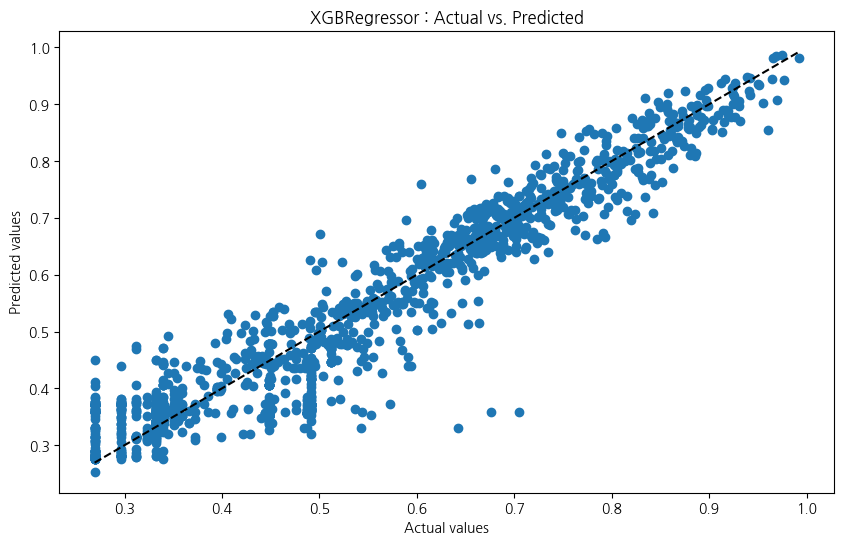

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Draw a diagonal line
plt.title('XGBRegressor : Actual vs. Predicted')
plt.show()

Best score (neg_mean_absolute_error):  -0.03248197266616798
Best parameters:  {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}
Test MAE: 0.032430912788703435


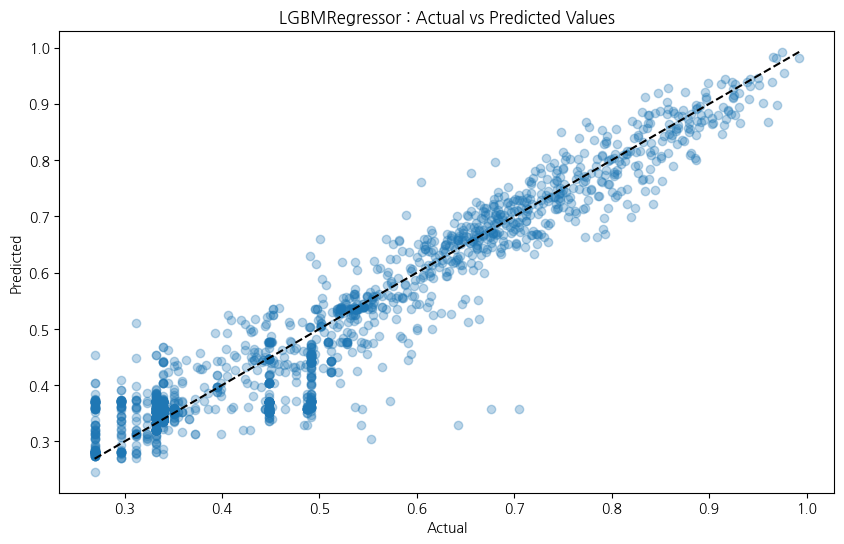

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Define the parameters for grid search
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, -1],  # -1 means no limit
}

# Initialize LGBMRegressor
lgbm = LGBMRegressor()

# Setup GridSearchCV
model = GridSearchCV(lgbm, params, cv = KFold(n_splits = 10, shuffle = True, random_state = 1011), scoring='neg_mean_absolute_error')

# Fit the model
model.fit(X_train, y_train)

# Print best parameters and score
print("Best score (neg_mean_absolute_error): ", model.best_score_)
print("Best parameters: ", model.best_params_)

# Predict on test set
pred = model.predict(X_test)

# Calculate and print MAE
print('Test MAE:', mean_absolute_error(y_test, pred))

# Visualize the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LGBMRegressor : Actual vs Predicted Values')
plt.show()


Linear Regression MAE: 0.0846267489520595
Ridge Regression MAE: 0.08466518697205411
Lasso Regression MAE: 0.14663913273965892
Random Forest MAE: 0.03272657833895361
Ridge Regression MAE: 0.08466518697205411


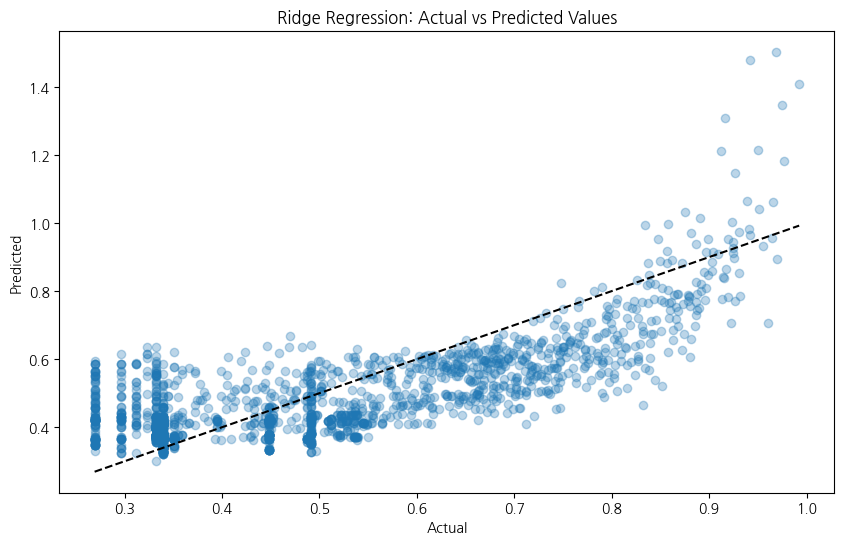

Lasso Regression MAE: 0.14663913273965892


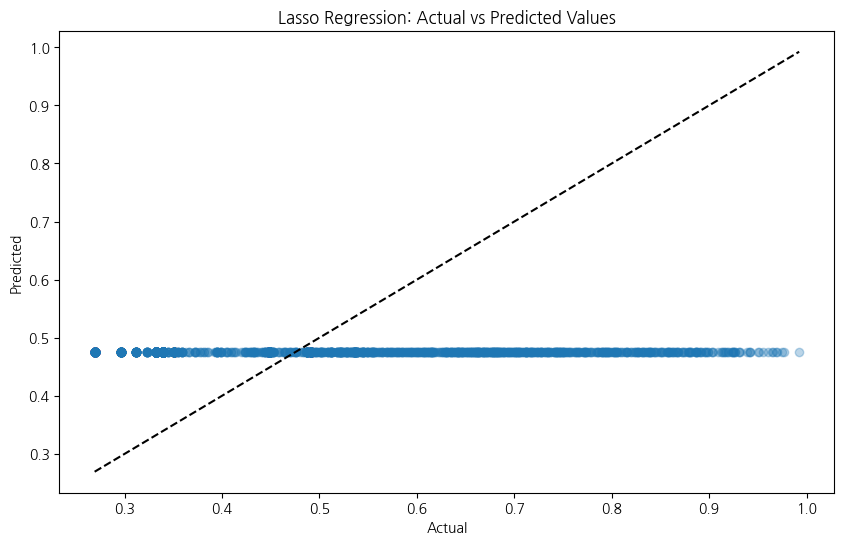

Random Forest MAE: 0.032686152550038365


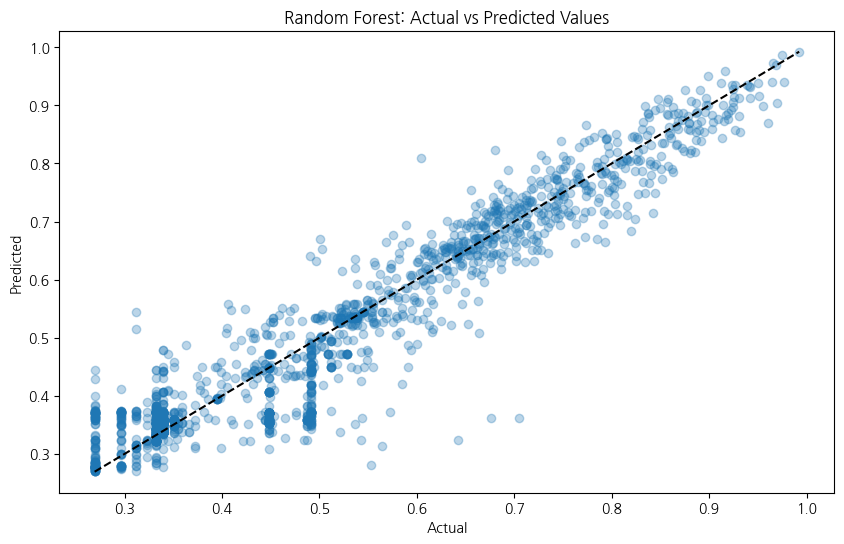

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 평균 대치를 사용
imputer.fit(X_train)  # X_train에 대해 fit 메서드를 호출하여 적합시킵니다

# X_train에 대해서만 결측값 처리를 수행합니다.
X_train = imputer.transform(X_train)
# X_test에 대해서도 결측값 처리를 수행합니다.
X_test = imputer.transform(X_test)



# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
print('Linear Regression MAE:', linear_mae)

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print('Ridge Regression MAE:', ridge_mae)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print('Lasso Regression MAE:', lasso_mae)

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print('Random Forest MAE:', rf_mae)





##시각화 코드

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print('Ridge Regression MAE:', ridge_mae)

# Visualize Ridge Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.show()

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
print('Lasso Regression MAE:', lasso_mae)

# Visualize Lasso Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.show()

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print('Random Forest MAE:', rf_mae)

# Visualize Random Forest predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted Values')
plt.show()



In [ ]:
!pip install scikit-optimize


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from skopt import BayesSearchCV
import matplotlib.pyplot as plt

params = {
    'learning_rate': [0.09, 0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

XG = XGBRegressor(objective='reg:squarederror')

# Grid Search
grid_model = GridSearchCV(XG, params, cv=KFold(n_splits=10, shuffle=True, random_state=1011),
                          scoring='neg_mean_absolute_error')
grid_model.fit(X_train, y_train)

# Random Search
random_model = RandomizedSearchCV(XG, params, n_iter=10, cv=KFold(n_splits=10, shuffle=True, random_state=1011),
                                  scoring='neg_mean_absolute_error')
random_model.fit(X_train, y_train)

# Bayesian Optimization
bayes_model = BayesSearchCV(XG, params, cv=KFold(n_splits=10, shuffle=True, random_state=1011),
                            scoring='neg_mean_absolute_error')
bayes_model.fit(X_train, y_train)

# Get best models and predictions
best_models = [grid_model.best_estimator_, random_model.best_estimator_, bayes_model.best_estimator_]
best_predictions = [model.predict(X_test) for model in best_models]

# Compute mean absolute error for each model
mae_scores = [mean_absolute_error(y_test, pred) for pred in best_predictions]


Grid Search MAE: 0.0323273969432525
Random Search MAE: 0.0385337396241705
Bayesian Optimization MAE: 0.0323273969432525


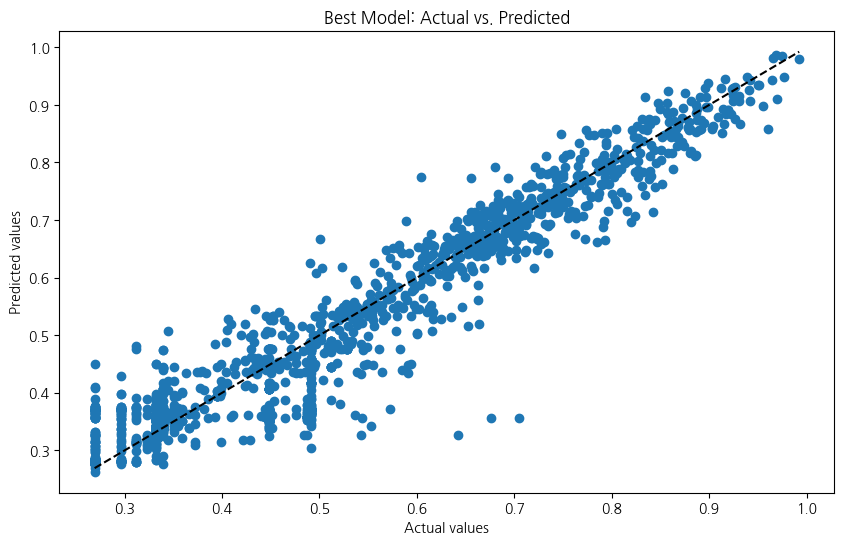

In [ ]:
# Calculate and print MAE for each model
mae_grid = mean_absolute_error(y_test, best_predictions[0])
mae_random = mean_absolute_error(y_test, best_predictions[1])
mae_bayes = mean_absolute_error(y_test, best_predictions[2])
print('Grid Search MAE:', mae_grid)
print('Random Search MAE:', mae_random)
print('Bayesian Optimization MAE:', mae_bayes)

# Select the best model
best_model_idx = mae_scores.index(min(mae_scores))
best_model = best_models[best_model_idx]
best_prediction = best_predictions[best_model_idx]

# Visualize the predictions for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Draw a diagonal line
plt.title('Best Model: Actual vs. Predicted')
plt.show()


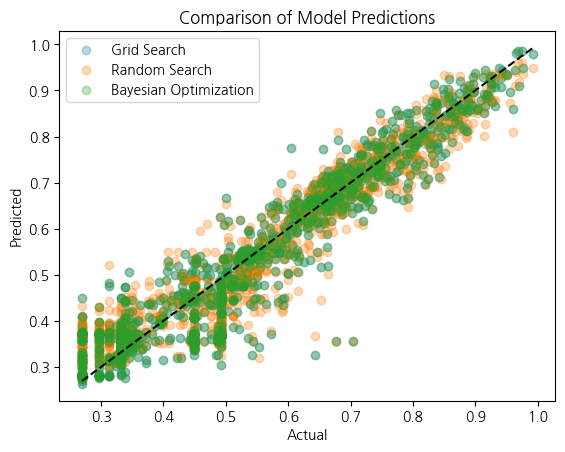

In [ ]:
# Grid Search
plt.scatter(y_test, best_predictions[0], alpha=0.3, label='Grid Search')
# Random Search
plt.scatter(y_test, best_predictions[1], alpha=0.3, label='Random Search')
# Bayesian Optimization
plt.scatter(y_test, best_predictions[2], alpha=0.3, label='Bayesian Optimization')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()

In [ ]:
!pip install optuna


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import optuna
import matplotlib.pyplot as plt

# Grid Search
grid_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, -1]
}
lgbm_grid = LGBMRegressor()
grid_search = GridSearchCV(lgbm_grid, grid_params, cv=KFold(n_splits=10, shuffle=True, random_state=1011), scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Random Search
random_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, -1]
}
lgbm_random = LGBMRegressor()
random_search = RandomizedSearchCV(lgbm_random, random_params, cv=KFold(n_splits=10, shuffle=True, random_state=1011), scoring='neg_mean_absolute_error')
random_search.fit(X_train, y_train)

# Bayesian Optimization
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 500]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, -1])
    }
    lgbm_bayes = LGBMRegressor(**params)
    lgbm_bayes.fit(X_train, y_train)
    pred = lgbm_bayes.predict(X_test)
    return mean_absolute_error(y_test, pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
bayes_params = study.best_params
lgbm_bayes = LGBMRegressor(**bayes_params)
lgbm_bayes.fit(X_train, y_train)

# Predict on test set for each model
pred_grid = grid_search.predict(X_test)
pred_random = random_search.predict(X_test)
pred_bayes = lgbm_bayes.predict(X_test)




Grid Search MAE: 0.03237695835756695
Random Search MAE: 0.032380827948743376
Bayesian Optimization MAE: 0.032330366217930374


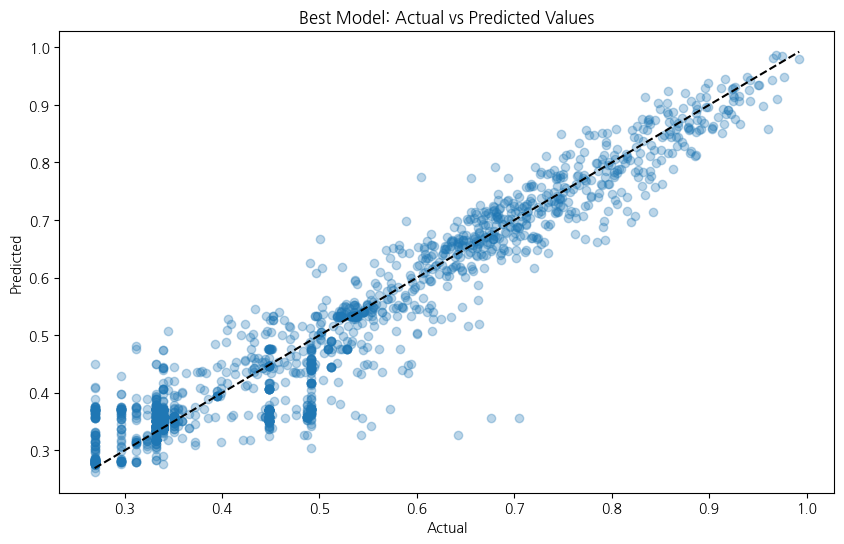

In [ ]:
# Calculate and print MAE for each model
mae_grid = mean_absolute_error(y_test, pred_grid)
mae_random = mean_absolute_error(y_test, pred_random)
mae_bayes = mean_absolute_error(y_test, pred_bayes)
print('Grid Search MAE:', mae_grid)
print('Random Search MAE:', mae_random)
print('Bayesian Optimization MAE:', mae_bayes)

# Select the best model
best_model_idx = mae_scores.index(min(mae_scores))
best_model = best_models[best_model_idx]
best_prediction = best_predictions[best_model_idx]


# Visualize the predictions for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_prediction, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Model: Actual vs Predicted Values')
plt.show()

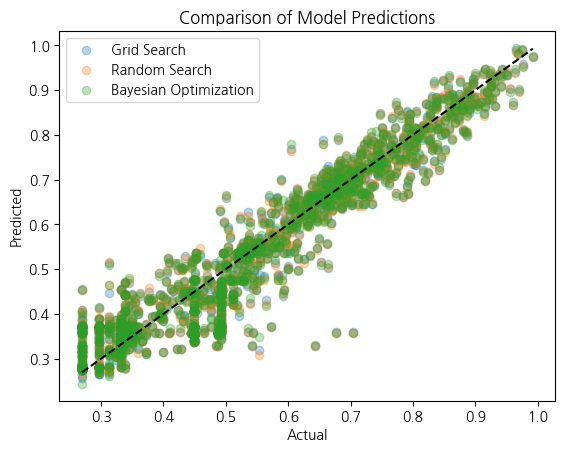

In [ ]:
# Grid Search
plt.scatter(y_test, pred_grid, alpha=0.3, label='Grid Search')
# Random Search
plt.scatter(y_test, pred_random, alpha=0.3, label='Random Search')
# Bayesian Optimization
plt.scatter(y_test, pred_bayes, alpha=0.3, label='Bayesian Optimization')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


In [ ]:
# !pip install kmodes

In [ ]:
# from kmodes.kprototypes import KPrototypes

# # Define numerical and categorical features
# num_features = ['전국관객수', '전국매출액']
# cat_features = ['감독', '배급사', '장르', '등급', '영화구분', '전국스크린수']

# # Extract features
# X_num = df1[num_features].values
# X_cat = df1[cat_features].values

# # Combine numerical and categorical feature arrays
# X = np.concatenate((X_num, X_cat), axis=1)

# # Initialize K-Prototypes model
# kproto = KPrototypes(n_clusters=3, init='Huang', verbose=2)  # you can adjust the number of clusters and other

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Fit the model and generate cluster labels
# clusters = kproto.fit_predict(X, categorical=[2, 3, 4, 5, 6])
#   # Indices of categorical columns - adjust as necessary

# # Assign cluster labels
# df1['Cluster'] = clusters

# # Visualize clusters using seaborn's scatterplot function
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='전국관객수', y='전국매출액', hue='Cluster', palette='viridis', data=df1)
# plt.title('Clustering Results based on Numerical Features')
# plt.show()

# categorical_features = ['감독', '장르', '등급', '영화구분']

# for feature in categorical_features:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(x='Cluster', hue=feature, data=df1)
#     plt.title(f'Cluster distribution in {feature}')
#     plt.show()


4. 모델 평가: 학습된 모델의 성능을 평가합니다. 예를 들어, 평균 제곱 오차 (MSE) 및 결정 계수 (R-squared)를 사용하여 모델의 예측 정확도를 측정할 수 있습니다.

5. 하이퍼파라미터 튜닝: 모델의 성능을 높이기 위해 하이퍼파라미터를 조정합니다.이 과정에서는 모델의 하이퍼파라미터를 변경하고, 이에 따른 모델의 성능을 평가하여 최적의 하이퍼파라미터 값을 찾습니다. 

이후에는 최종 모델을 선택하고, 새로운 데이터에 대한 예측을 수행할 수 있습니다.